In [1]:
#Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [2]:
#Reading the data
data = pd.read_csv('archive/ifood_df.csv')

#Taking a look at the top 5 rows of the data
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
#Reviewing data columns
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [4]:
#Looking for missing values
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [5]:
#Checking column types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [6]:
#Assessing unique values
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [7]:
data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [13]:
data_dup=data[data.duplicated()]
print("you have {} duplicate rows".format(len(data_dup)))

you have 184 duplicate rows


In [15]:
# Drop 184 duplicate rows
data.drop_duplicates(keep=False, inplace=True)

In [16]:
#First, Change Column data type to string and then replace 1 with different number & 0 with blank.
data['marital_Married']=data['marital_Married'].astype(str).replace({'1':'5','0':''})
data['marital_Single']=data['marital_Single'].astype(str).replace({'1':'4','0':''})
data['marital_Together']=data['marital_Together'].astype(str).replace({'1':'3','0':''})
data['marital_Widow']=data['marital_Widow'].astype(str).replace({'1':'2','0':''})
data['marital_Divorced']=data['marital_Divorced'].astype(str).replace({'0':''})
#Now all columns contain different numbers for different marital status, lets join them in one column.
data['marital_status']=data["marital_Widow"]+data['marital_Together']+data['marital_Single']+data['marital_Married']+data['marital_Divorced']
#Next, we map numbers into different categorical values.
data['marital_status']=data['marital_status'].map({'1':'Divorced', '2':'Widow','3':'Together','4':'Single','5':'Married'})

In [17]:
#Let's do same operation, as above, for education columns.
data['education_2n Cycle']=data['education_2n Cycle'].astype(str).replace({'0':''})
data['education_Basic']=data['education_Basic'].astype(str).replace({'1':'2','0':''})
data['education_Graduation']=data['education_Graduation'].astype(str).replace({'1':'3','0':''})
data['education_Master']=data['education_Master'].astype(str).replace({'1':'4','0':''})
data['education_PhD']=data['education_PhD'].astype(str).replace({'1':'5','0':''})
data['education_level']=data['education_2n Cycle']+data['education_Basic']+data['education_Graduation']+data['education_Master']+data['education_PhD']
data['education_level']=data['education_level'].map({'1':'2n Cycle','2':'Basic','3':'Graduation','4':'Master','5':'PhD'})

In [18]:
data['kids']=data['Kidhome']+data['Teenhome']

In [19]:
#we drop all unnecessary columns to make dataset simple
data.drop(['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD','marital_Widow','marital_Together','marital_Single','marital_Married','marital_Divorced','Kidhome','Teenhome'], axis=1)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,1,63,2822,1529,1441,0,Single,Graduation,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,66,2272,21,15,0,Single,Graduation,2
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,55,2471,734,692,0,Together,Graduation,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,36,2298,48,43,0,Together,Graduation,1
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,39,2320,407,392,0,Married,PhD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,50,5,1,6,3,4,3,1,0,...,0,0,34,2840,19,16,0,Single,Graduation,0
2200,61223.0,46,709,43,182,42,118,247,2,9,...,0,0,53,2540,1094,847,0,Married,Graduation,1
2202,56981.0,91,908,48,217,32,12,24,1,2,...,0,0,39,2314,1217,1193,1,Divorced,Graduation,0
2203,69245.0,8,428,30,214,80,30,61,2,6,...,0,0,64,2315,782,721,0,Together,Master,1


In [5]:
#EDA & Visualizations

sns.countplot(x="education_level", data=data)
plt.show()

NameError: name 'sns' is not defined

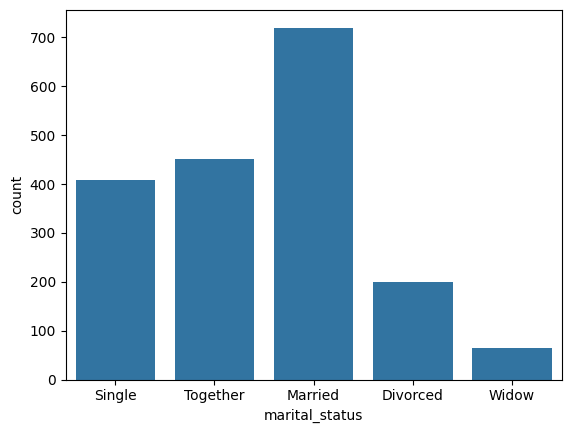

In [28]:
sns.countplot(x="marital_status", data=data)
plt.show()

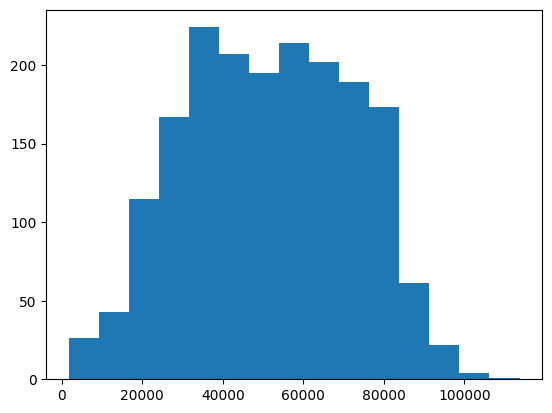

In [29]:
plt.hist(data["Income"], bins=15)
plt.show()

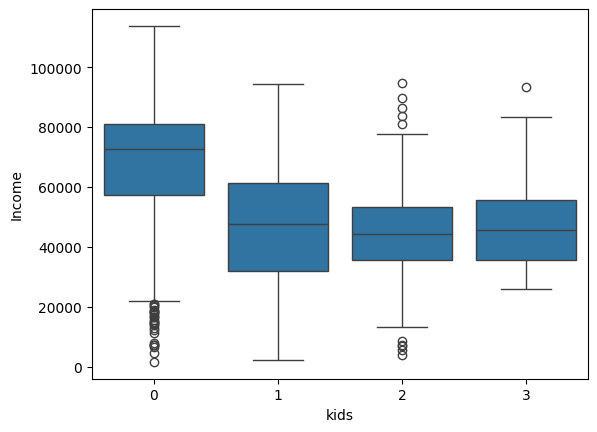

In [31]:
sns.boxplot(y=data["Income"], x=data["kids"])
plt.show()

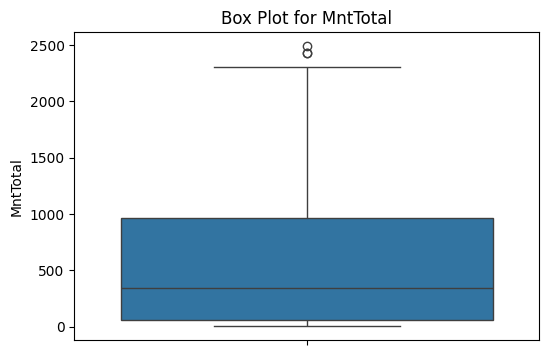

In [32]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

In [33]:
#Outliers
Q1 = data['MntTotal'].quantile(0.25)
Q3 = data['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['MntTotal'] < lower_bound) | (data['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,,,4,,2429,2333,1,Single,Master,0
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,,3,,,2491,2458,3,Together,Graduation,0
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,,,4,,2429,2333,1,Single,Master,0


In [34]:
#Outliers removal
data = data[(data['MntTotal'] > lower_bound) & (data['MntTotal'] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,kids
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,...,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,51693.965761,0.444565,0.513587,48.748370,305.727174,26.127174,165.647826,37.307065,27.224457,43.786413,...,0.066848,0.011957,0.009783,0.155978,51.170652,2511.055978,562.033696,518.247283,0.303261,0.958152
std,20688.125008,0.534989,0.548695,28.966337,336.294139,39.499246,220.390352,54.890962,41.829922,51.703483,...,0.249826,0.108720,0.098449,0.362933,11.605216,202.502395,573.108761,551.153105,0.677768,0.741740
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,24.000000,2159.000000,4.000000,-283.000000,0.000000,0.000000
25%,35671.750000,0.000000,0.000000,24.000000,23.000000,2.000000,16.000000,2.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,43.000000,2336.000000,55.000000,41.750000,0.000000,0.000000
50%,51566.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,50.000000,2509.000000,343.000000,289.000000,0.000000,1.000000
75%,68119.250000,1.000000,1.000000,74.000000,507.250000,33.000000,222.500000,50.000000,34.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,2687.000000,962.000000,880.750000,0.000000,1.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,197.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,80.000000,2858.000000,2304.000000,2259.000000,4.000000,3.000000


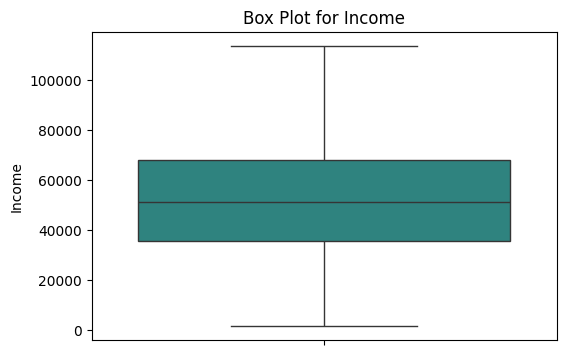

In [35]:
#Box plot and histogram for income
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='Income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

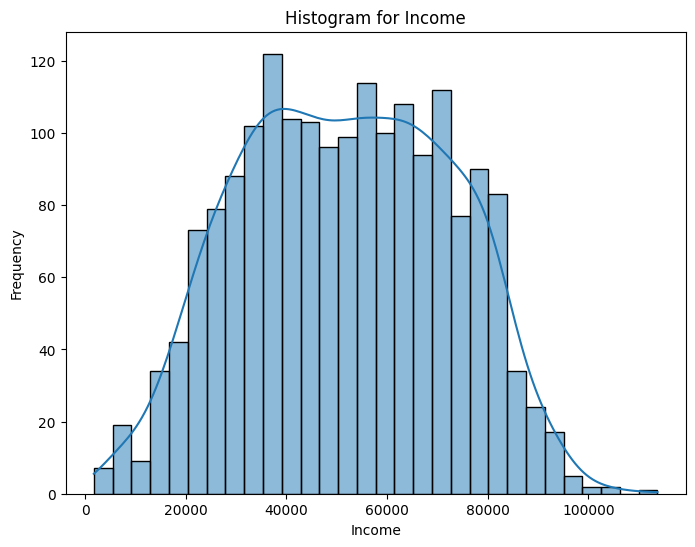

In [36]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


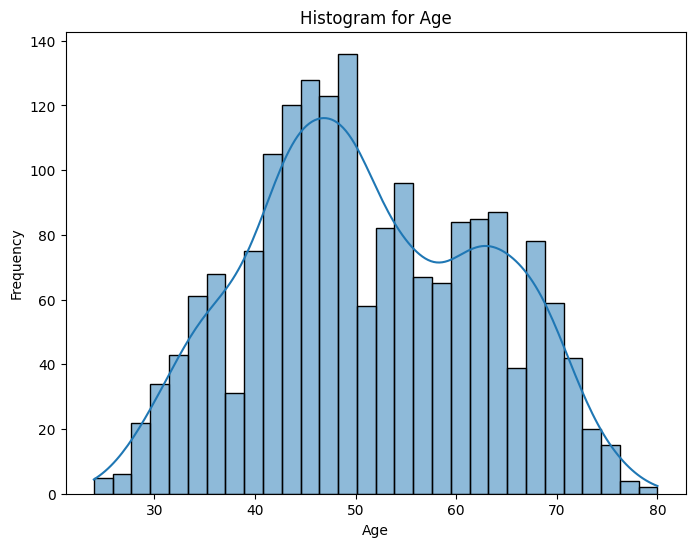

In [37]:
#Histogram for age
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [38]:
print("Skewness: %f" % data['Age'].skew())
print("Kurtosis: %f" % data['Age'].kurt())

Skewness: 0.095690
Kurtosis: -0.808306


In [1]:
from sklearn.cluster import KMeans

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

NameError: name 'data' is not defined